In [5]:
import os
import warnings
import pandas as pd

warnings.filterwarnings('ignore') # 경고무시

path = './대전태평/'
file_list = os.listdir('대전태평')
file_list_py = [file for file in file_list if file.endswith('.xlsx')]

df = pd.DataFrame()
for file in file_list_py:
    data = pd.read_excel(path + file)
    df = pd.concat([df, data])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69548 entries, 0 to 8747
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 4.2+ MB


In [6]:
df = df.reset_index(drop=True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20150101,0,16.3,44.52,736
1,대전태평,(암반),20150101,1,16.3,44.52,736
2,대전태평,(암반),20150101,2,16.3,44.52,736
3,대전태평,(암반),20150101,3,16.3,44.52,736
4,대전태평,(암반),20150101,4,16.3,44.52,736
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20111231,4,16.3,44.30,764
69544,대전태평,(암반),20111231,3,16.3,44.30,764
69545,대전태평,(암반),20111231,2,16.3,44.30,764
69546,대전태평,(암반),20111231,1,16.3,44.30,764


In [8]:
df['Date'] = pd.to_datetime(df['날짜'], format='%Y%m%d') + pd.to_timedelta(df['시간'].astype(int), unit='h')
df.set_index(df['Date'], inplace=True)
df.head()

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2015-01-01 00:00:00,대전태평,(암반),20150101,0,16.3,44.52,736,2015-01-01 00:00:00
2015-01-01 01:00:00,대전태평,(암반),20150101,1,16.3,44.52,736,2015-01-01 01:00:00
2015-01-01 02:00:00,대전태평,(암반),20150101,2,16.3,44.52,736,2015-01-01 02:00:00
2015-01-01 03:00:00,대전태평,(암반),20150101,3,16.3,44.52,736,2015-01-01 03:00:00
2015-01-01 04:00:00,대전태평,(암반),20150101,4,16.3,44.52,736,2015-01-01 04:00:00


In [17]:
df1 = df[['수온(℃)','수위(el.m)','EC(㎲/㎝)']]
df1.columns = ['temp','level','EC']
df1.head()

,temp,level,EC
Date,,,
2015-01-01 00:00:00,16.3,44.52,736
2015-01-01 01:00:00,16.3,44.52,736
2015-01-01 02:00:00,16.3,44.52,736
2015-01-01 03:00:00,16.3,44.52,736
2015-01-01 04:00:00,16.3,44.52,736


In [18]:
df1.isnull().sum()

temp     0
level    0
EC       0
dtype: int64

In [19]:
df1.to_csv('대전지하수.csv', encoding='utf-8')


array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'level'}>],
       [<Axes: title={'center': 'EC'}>, <Axes: >]], dtype=object)

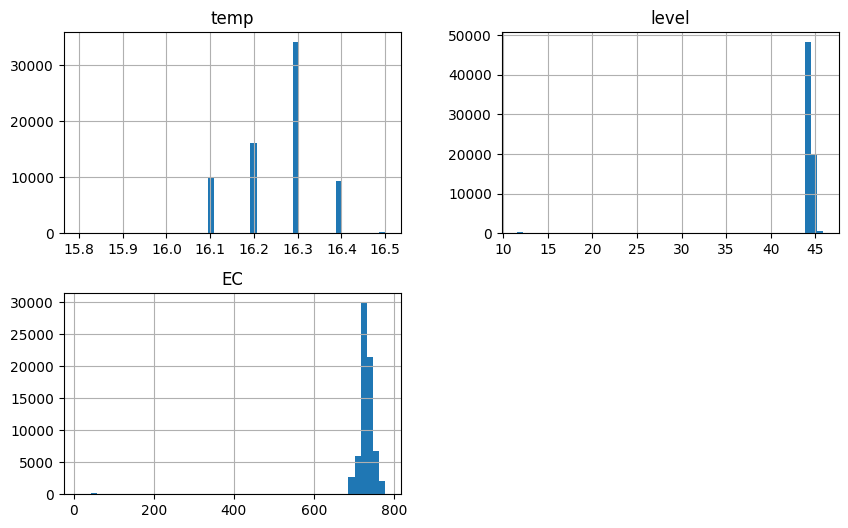

In [20]:
df1.hist(bins=50, figsize=(10,6))

<Axes: >

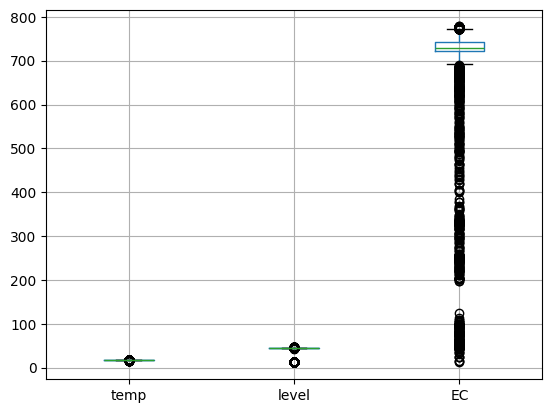

In [21]:
df1.boxplot()

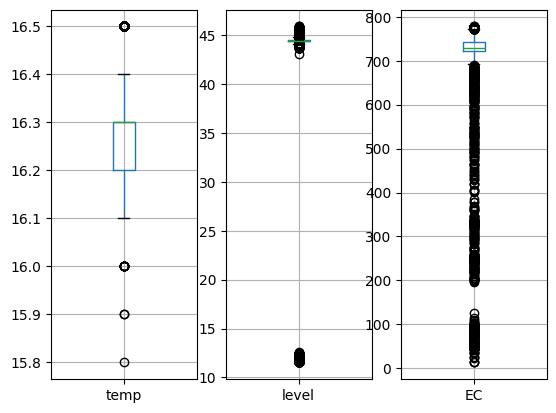

In [22]:
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
df1.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df1.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df1.boxplot(column='EC', return_type='both')
plt.show()

<Axes: xlabel='Date'>

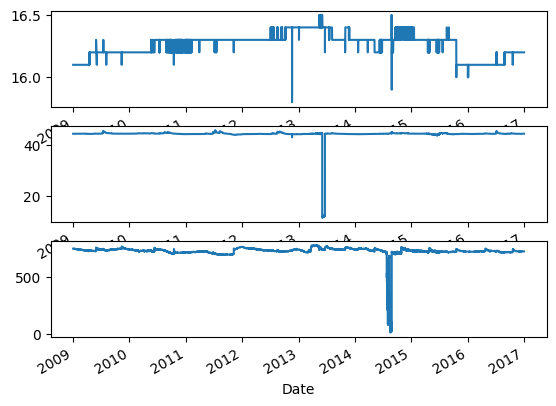

In [23]:
plt.subplot(3, 1, 1)
df1['temp'].plot()
plt.subplot(3, 1, 2)
df1['level'].plot()
plt.subplot(3, 1, 3)
df1['EC'].plot()

In [24]:
q3_level = df1['level'].quantile(q=0.75)
q1_level = df1['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
iqr_level

0.17999999999999972

In [25]:
# IQR을 이용해서 상한값과 하한값을 구한다.
upper_level = q3_level + iqr_level * 1.5 #상한값
lower_level = q1_level - iqr_level * 1.5 #하한값

print((df1['level'] > upper_level).sum())
print((df1['level'] > lower_level).sum())


4492
68275


<Axes: xlabel='Date'>

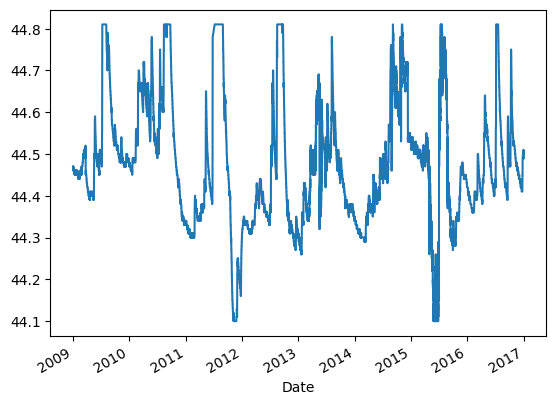

In [26]:
df_iqr_level = df1[(df1['level'] < upper_level) & (df1['level'] > lower_level)]
df_iqr_level['level'].plot()

<Axes: xlabel='Date'>

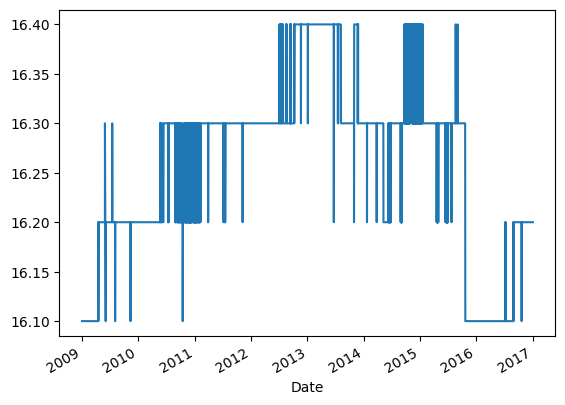

In [27]:
q3_temp = df1['temp'].quantile(q=0.75)
q1_temp = df1['temp'].quantile(q=0.25)
iqr_temp = q3_temp - q1_temp

upper_temp = q3_temp + iqr_temp * 1.5
lower_temp = q1_temp - iqr_temp * 1.5

df_iqr_temp = df1[(df1['temp'] < upper_temp) & (df1['temp'] > lower_temp)]
df_iqr_temp['temp'].plot()

<Axes: xlabel='Date'>

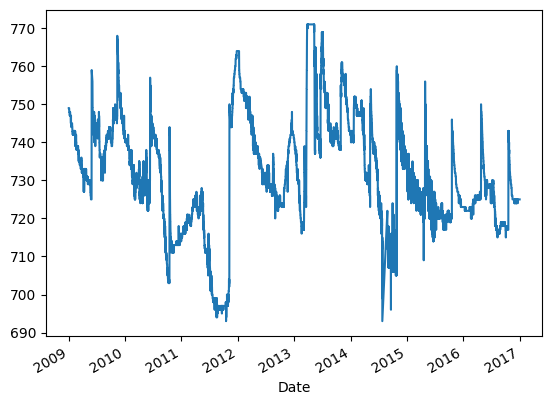

In [28]:
q3_ec = df1['EC'].quantile(q=0.75)
q1_ec = df1['EC'].quantile(q=0.25)
iqr_ec = q3_ec - q1_ec

upper_ec = q3_ec + iqr_ec * 1.5
lower_ec = q1_ec - iqr_ec * 1.5

df_iqr_ec = df1[(df1['EC'] < upper_ec) & (df1['EC'] > lower_ec)]
df_iqr_ec['EC'].plot()

In [29]:
df_iqr = df1[(df1['EC'] < upper_ec) & (df1['EC'] > lower_ec) & (df1['temp'] < upper_temp) & (df1['temp'] > lower_temp) & (df1['level'] < upper_level) & (df1['level'] > lower_level)]

df_iqr.describe()

,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


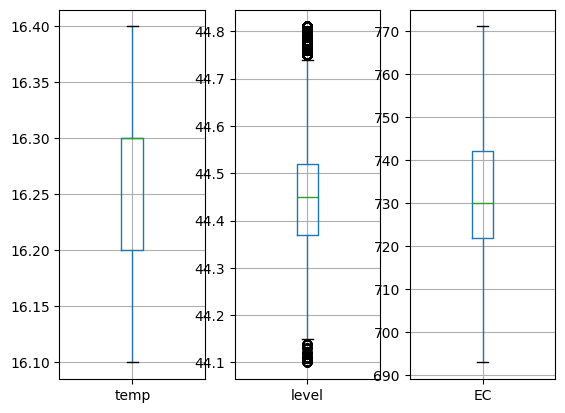

In [30]:
plt.subplot(1, 3, 1)
df_iqr.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df_iqr.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df_iqr.boxplot(column='EC', return_type='both')
plt.show()

In [39]:
#표준화
df2 = df_iqr[['level','EC']].copy()
df2.head()
df2['level_z_score'] = (df2['level']-df2['level'].mean())/df2['level'].std()
df2['EC_z_score'] = (df2['EC']-df2['EC'].mean())/df2['EC'].std()
df2
df2.describe()


,level,EC,level_z_score,EC_z_score
count,61814.000000,61814.000000,6.181400e+04,6.181400e+04
mean,44.459701,731.698612,1.326414e-14,-2.059877e-15
std,0.128256,13.882905,1.000000e+00,1.000000e+00
min,44.100000,693.000000,-2.804553e+00,-2.787501e+00
25%,44.370000,722.000000,-6.993901e-01,-6.986011e-01
50%,44.450000,730.000000,-7.563803e-02,-1.223528e-01
75%,44.520000,742.000000,4.701450e-01,7.420196e-01
max,44.810000,771.000000,2.731246e+00,2.830920e+00


array([[<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'EC'}>]], dtype=object)

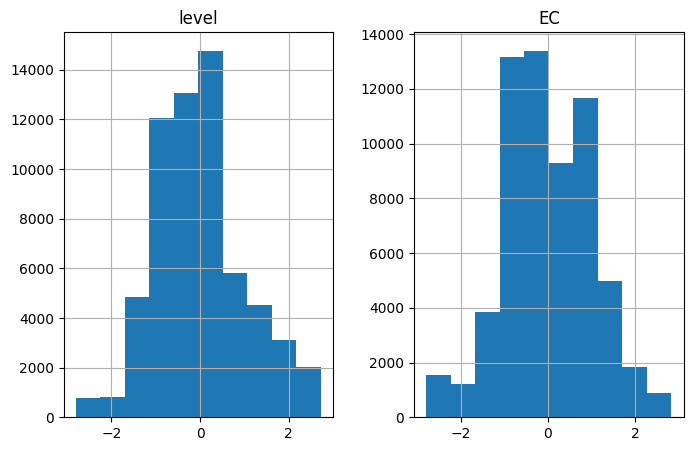

In [34]:
df3 = df_iqr[['level','EC']].copy()
df3_standard = (df3 - df3.mean()) / df3.std()
df3_standard.head()
df3_standard.hist(figsize=(8,5))

In [43]:
#정규화 : 최대값과 최소값을 이용하여 0~1 사이로 진처리
df4 = df_iqr[['level', 'EC']].copy()
df4['level_minmax'] = (df4['level'] - df4['level'].min() / (df4['level'].max()- df4['level'].min()))
df4['EC_minmax'] = (df4['EC'] - df4['EC'].min() / (df4['EC'].max()- df4['EC'].min()))
df4.head()

,level,EC,level_minmax,EC_minmax
Date,,,,
2015-01-01 00:00:00,44.52,736,-17.592676,727.115385
2015-01-01 01:00:00,44.52,736,-17.592676,727.115385
2015-01-01 02:00:00,44.52,736,-17.592676,727.115385
2015-01-01 03:00:00,44.52,736,-17.592676,727.115385
2015-01-01 04:00:00,44.52,736,-17.592676,727.115385
